In [76]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [77]:
from pandasql import sqldf

In [78]:
pysqldf = lambda q: sqldf(q, globals())

In [79]:
pysqldf

<function __main__.<lambda>>

In [80]:
sqladb = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

In [81]:
sqladb
sqladb.columns=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
                'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'class']

In [82]:
sqladb.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1. Select 10 records from the adult sqladb

In [83]:
sqladb.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


2) Show me the average hours per week of all men who are working in private sector

In [84]:
pysqldf("""select workclass, avg(hours_per_week) from sqladb 
            where trim(workclass)='Private'
            group by workclass
           """)

,workclass,avg(hours_per_week)
0,Private,40.267096


3) Show me the frequency table for education, occupation and relationship, separately

In [85]:
education = pd.crosstab(index=sqladb["education"],  # Make a crosstab
                              columns="count")
education

col_0,count
education,
10th,933
11th,1175
12th,433
1st-4th,168
5th-6th,333
7th-8th,646
9th,514
Assoc-acdm,1067
Assoc-voc,1382


In [86]:
occupation = pd.crosstab(index=sqladb["occupation"],  # Make a crosstab
                              columns="count")
occupation

col_0,count
occupation,
?,1843
Adm-clerical,3769
Armed-Forces,9
Craft-repair,4099
Exec-managerial,4066
Farming-fishing,994
Handlers-cleaners,1370
Machine-op-inspct,2002
Other-service,3295


In [87]:
relationship = pd.crosstab(index=sqladb["relationship"],  # Make a crosstab
                              columns="count")
relationship

col_0,count
relationship,
Husband,13193
Not-in-family,8304
Other-relative,981
Own-child,5068
Unmarried,3446
Wife,1568


4) Are there any people who are married, working in private sector and having a masters
degree


In [88]:
pysqldf("""select count(*) as "Number people who are married, working in private sector and having a masters degree"
            from sqladb 
            where substr(trim(marital_status),1,7)='Married' and trim(workclass)='Private' and trim(education)='Masters'
                   """)



,"Number people who are married, working in private sector and having a masters degree"
0,540


5) What is the average, minimum and maximum age group for people working in different sectors

In [89]:
pysqldf("""select workclass, cast(round(avg(age)) as int) as Average_Age, min(age) as Minimum_Age, max(age) as Maximum_Age
            from sqladb 
            group by workclass
           """)

,workclass,Average_Age,Minimum_Age,Maximum_Age
0,?,41,17,90
1,Federal-gov,43,17,90
2,Local-gov,42,17,90
3,Never-worked,21,17,30
4,Private,37,17,90
5,Self-emp-inc,46,17,84
6,Self-emp-not-inc,45,17,90
7,State-gov,39,17,81
8,Without-pay,48,19,72


6) Calculate age distribution by country

<Container object of 42 artists>

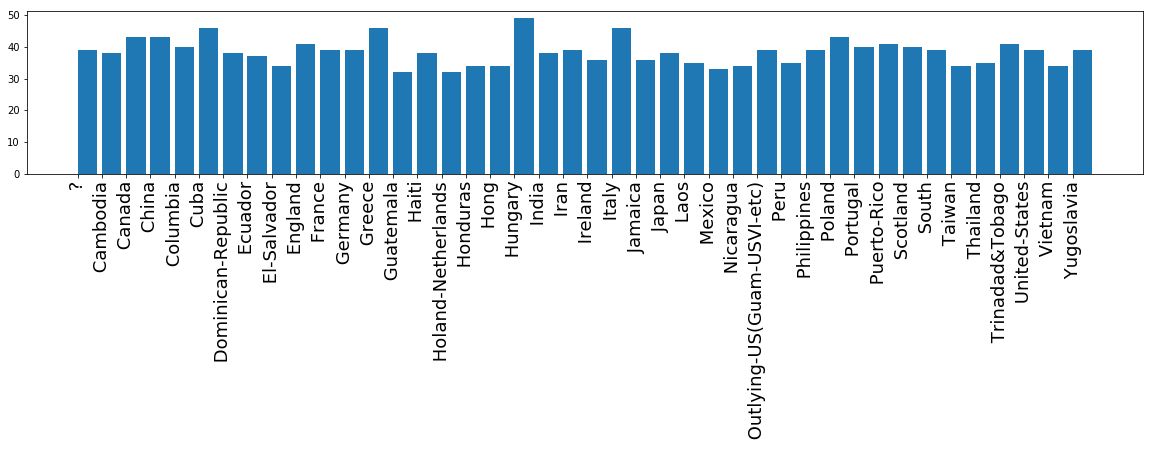

In [90]:
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

acdb=pysqldf("""select native_country, cast(round(avg(age)) as int) age
             from sqladb
             group by native_country""")

xlabels = acdb['native_country']
plot.figure(figsize=(20, 3))
plot.xticks(np.arange(xlabels.shape[0]),xlabels,rotation='vertical', fontsize=18)
plot.xticks

plot.bar(np.arange(acdb.values.shape[0]),acdb['age'],align='edge')


7) Compute a new column as 'Net-Capital-Gain' from the two columns 'capital-gain' and 'capital-loss'

In [91]:
sqladb['Net_Capital_Gain']=sqladb['capital_gain']-sqladb['capital_loss']
sqladb.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,Net_Capital_Gain
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,0
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,14084
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,5178
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,0
